In [ ]:
## Load the dataset from the tensorflow library.
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
## Preprocess the dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

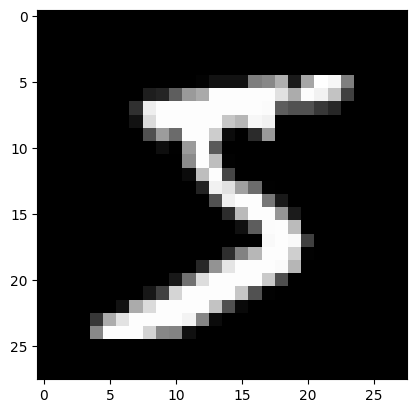

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

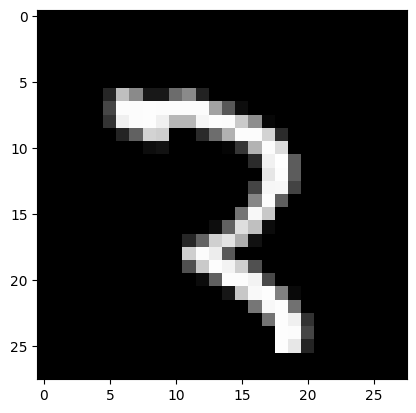

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
## Create and train your model.
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
## Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
## Fit the model
model.fit(X_train_scaled ,y_train_onehot, epochs=8,batch_size=128, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/8
469/469 [==============================] - 24s 49ms/step - loss: 0.3435 - accuracy: 0.8996 - val_loss: 0.1340 - val_accuracy: 0.9616
Epoch 2/8
469/469 [==============================] - 21s 45ms/step - loss: 0.1041 - accuracy: 0.9696 - val_loss: 0.0745 - val_accuracy: 0.9759
Epoch 3/8
469/469 [==============================] - 19s 41ms/step - loss: 0.0680 - accuracy: 0.9801 - val_loss: 0.0553 - val_accuracy: 0.9823
Epoch 4/8
469/469 [==============================] - 21s 44ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.0562 - val_accuracy: 0.9813
Epoch 5/8
469/469 [==============================] - 21s 45ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0527 - val_accuracy: 0.9832
Epoch 6/8
469/469 [==============================] - 19s 41ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 7/8
469/469 [==============================] - 21s 44ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0500 - val_accuracy: 0.9843

In [ ]:
## Include the training loss, validation loss vs iteration plot.
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.343471,0.899633,0.133976,0.9616
1,0.104090,0.969550,0.074497,0.9759
2,0.067975,0.980117,0.055329,0.9823
3,0.052005,0.984033,0.056179,0.9813
4,0.042577,0.987300,0.052724,0.9832


<Axes: >

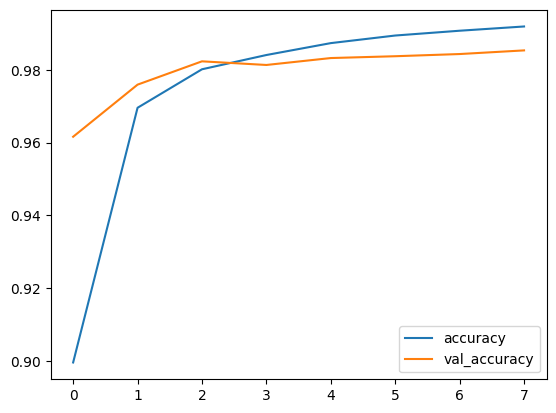

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

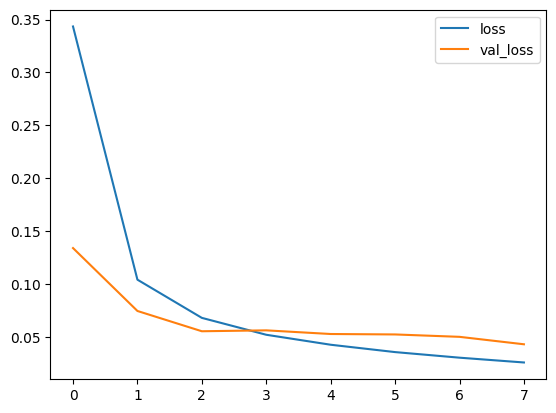

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:

## Test the model for your handwritten scanned images.
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 971    0    0    0    2    1    3    1    2    0]
 [   0 1131    1    1    1    0    0    0    1    0]
 [   2    3 1016    1    3    0    0    5    2    0]
 [   0    0    2 1001    0    1    0    2    3    1]
 [   0    0    1    0  971    0    0    0    0   10]
 [   1    0    0    5    0  881    5    0    0    0]
 [   5    3    0    0    6    1  943    0    0    0]
 [   1    4    9    2    2    0    0 1008    1    1]
 [   5    0    3    4    3    2    3    4  947    3]
 [   2    2    0    3    9    2    0    2    5  984]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Prediction for a single input
img = image.load_img('8.jpg')
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 58ms/step


In [ ]:
print(x_single_prediction)

[9]


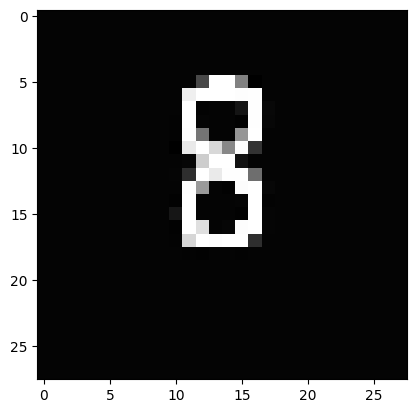

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:

print(x_single_prediction)

[8]
